In [2]:
#My goal is to see if the falls in the twin cities are getting warmer. The data taken
#is from DNR, this data is specifically from the Twin Cities. 
#I have noticed that the falls have been getting warmer, and I want to know if
#I am just crazy, or if I am actually noticing climate change happen. 
#My hypothesis is going to be that the number of 75F+ degree days increases
#by an average of .1 days/year since 1950 which means every decade
#there is an average of 1 extra day in the fall with 75F+ temperature
#I first downloaded the data and I found that I accidently downloaded a decade
#twice. Im using the recorded high temperature of each day. The number of days
#greater than 75F+ is my statistic. 
#The timespan of the data is from the 1880's when the DNR started capturing this data,
#and the present. There is a single record for each day. Im defining fall as months
#9-11, not the technical definition of fall. 
#because technically fall ends on December 21st, but aint nobody consider Dec 20th
#fall. This data is from a single station, the minneapolis-St.Paul station. 


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
#standard imports, the new one here is glob, for loading multiple CSV files.

In [3]:
path = r"E:\Data Preperation and Analysis\Choose Your own Hypothesis\DataDowloadCSV*.csv"

files = glob.glob(path)

len(files)
#This basically just says where all my CSV's are and it counts total number of files. 

17

In [4]:
dfs = []

for f in files:
    temp = pd.read_csv(f)
    temp['source_file'] = f
    dfs.append(temp)

df = pd.concat(dfs, ignore_index=True)

df.shape
# reads each CSV into a data fram and combines into one dataset. 

(60611, 7)

In [5]:
df.head()
df.info()
df.describe()
#just previewing first couple rows, checking for missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60611 entries, 0 to 60610
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Date                             60611 non-null  object
 1   Maximum Temperature degrees (F)  60611 non-null  object
 2   Minimum Temperature degrees (F)  60611 non-null  object
 3   Precipitation (inches)           60611 non-null  object
 4   Snow (inches)                    60611 non-null  object
 5   Snow Depth (inches)              60611 non-null  object
 6   source_file                      60611 non-null  object
dtypes: object(7)
memory usage: 3.2+ MB


,Date,Maximum Temperature degrees (F),Minimum Temperature degrees (F),Precipitation (inches),Snow (inches),Snow Depth (inches),source_file
count,60611,60611.0,60611.0,60611,60611,60611,60611
unique,53305,241.0,235.0,284,120,37,17
top,1948-07-08,78.0,60.0,0.00,0.00,0.00,E:\Data Preperation and Analysis\Choose Your o...
freq,2,1081.0,1168.0,30994,47836,37162,3653


In [6]:

df['Date'].duplicated().sum()


7306

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


df['Date'].isna().sum()
#converting to datetime format. 

0

In [8]:
num_cols = [
    'Maximum Temperature degrees (F)',
    'Minimum Temperature degrees (F)',
    'Precipitation (inches)',
    'Snow (inches)',
    'Snow Depth (inches)'
]

for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df[num_cols].dtypes
#identifying weather variables as string, and converting them to numeric format. 

Maximum Temperature degrees (F)    float64
Minimum Temperature degrees (F)    float64
Precipitation (inches)             float64
Snow (inches)                      float64
Snow Depth (inches)                float64
dtype: object

In [9]:
df[num_cols].isna().mean().sort_values(ascending=False)
df[num_cols].describe()
(df['Maximum Temperature degrees (F)'] < df['Minimum Temperature degrees (F)']).sum()
#checking proportion of missing values. Confirming consistenct between min and max temps. 

0

In [10]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['dayofyear'] = df['Date'].dt.dayofyear


In [11]:
max_col = 'Maximum Temperature degrees (F)'

fall = df[df['month'].isin([9, 10, 11])].copy()

fall['warm75'] = (fall[max_col] >= 75).astype(int)


yearly = (
    fall.groupby('year')['warm75']
        .sum()
        .reset_index(name='warm75_days_fall')
)


yearly.head(), yearly.tail()

yearly['warm75_days_fall'].describe()
yearly.sort_values('warm75_days_fall', ascending=False).head(10)

#Defining fall as months 9-11, checking how many days were above 75F
#in months 9-11,
#and then doing a quick check to make sure Im capturing the data correctly. 


,year,warm75_days_fall
67,1947,54
40,1920,50
60,1940,46
42,1922,46
68,1948,44
47,1927,38
45,1925,36
144,2024,33
61,1941,30
43,1923,30


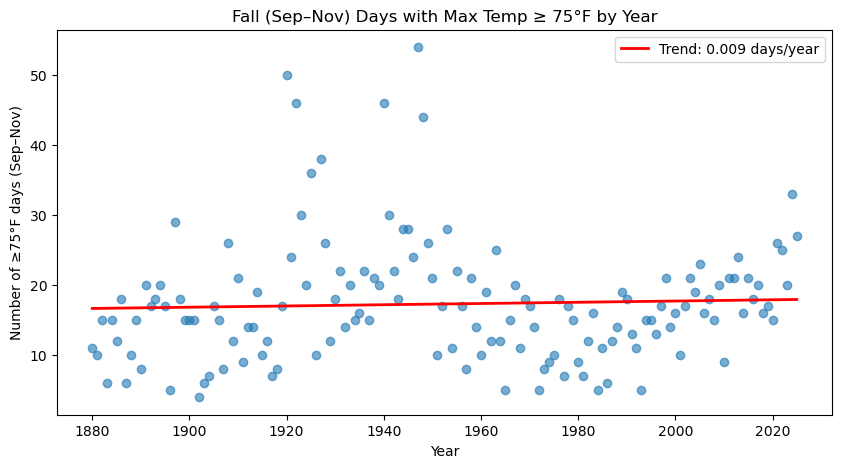

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
plt.scatter(yearly['year'], yearly['warm75_days_fall'], alpha=0.6)

m, b = np.polyfit(yearly['year'], yearly['warm75_days_fall'], 1)
x = np.array([yearly['year'].min(), yearly['year'].max()])
plt.plot(x, m*x + b, color='red', linewidth=2, label=f"Trend: {m:.3f} days/year")

plt.title("Fall (Sep–Nov) Days with Max Temp ≥ 75°F by Year")
plt.xlabel("Year")
plt.ylabel("Number of ≥75°F days (Sep–Nov)")
plt.legend()
plt.show()


In [13]:


max_col = 'Maximum Temperature degrees (F)'

fall = df[df['month'].isin([9, 10, 11])].copy()

quantiles = (
    fall.groupby('year')[max_col]
        .quantile([0.05, 0.25, 0.50, 0.75, 0.95])
        .unstack()
        .reset_index()
)

quantiles.columns = [
    'year',
    'p5',    # 5th percentile
    'p25',   # lower quartile
    'p50',   # median
    'p75',   # upper quartile
    'p95'    # 95th percentile
]

quantiles.head()


,year,p5,p25,p50,p75,p95
0,1880,14.5,40.0,56.0,67.0,81.5
1,1881,28.5,44.5,56.0,66.0,79.0
2,1882,32.0,48.0,58.0,69.0,83.0
3,1883,36.0,46.0,54.0,65.0,75.5
4,1884,25.5,46.0,63.0,72.0,81.0


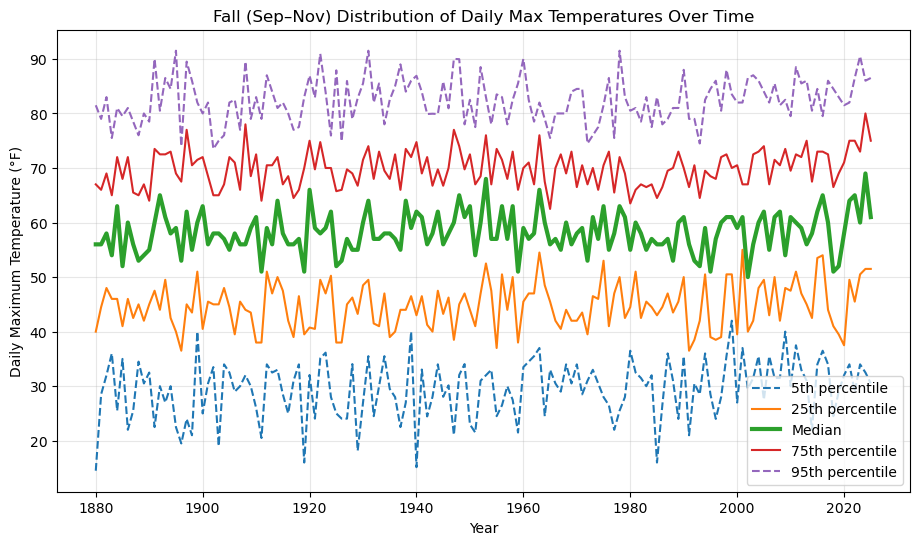

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11,6))

plt.plot(quantiles['year'], quantiles['p5'],  label='5th percentile', linestyle='--')
plt.plot(quantiles['year'], quantiles['p25'], label='25th percentile')
plt.plot(quantiles['year'], quantiles['p50'], label='Median', linewidth=3)
plt.plot(quantiles['year'], quantiles['p75'], label='75th percentile')
plt.plot(quantiles['year'], quantiles['p95'], label='95th percentile', linestyle='--')

plt.title("Fall (Sep–Nov) Distribution of Daily Max Temperatures Over Time")
plt.xlabel("Year")
plt.ylabel("Daily Maximum Temperature (°F)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


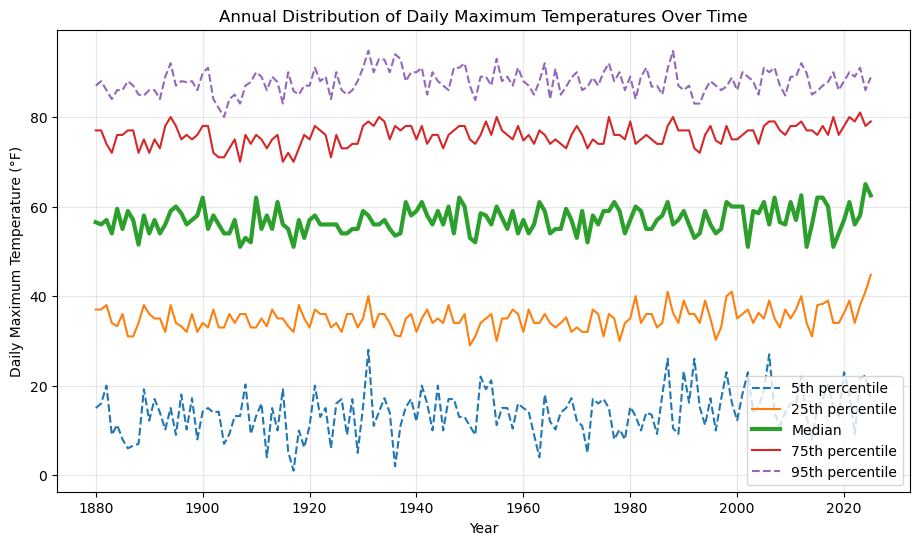

In [15]:
# This is basically copy and paste, except instead of just fall, its for the entire year, 
#because I want to see if there is still the same variation over time, because maybe 
#seasonal temperatures shift over time. 


max_col = 'Maximum Temperature degrees (F)'

all_year = df.copy()

quantiles_all = (
    all_year.groupby('year')[max_col]
            .quantile([0.05, 0.25, 0.50, 0.75, 0.95])
            .unstack()
            .reset_index()
)

quantiles_all.columns = [
    'year',
    'p5',    # 5th percentile
    'p25',   # lower quartile
    'p50',   # median
    'p75',   # upper quartile
    'p95'    # 95th percentile
]

quantiles_all.head()
import matplotlib.pyplot as plt

plt.figure(figsize=(11,6))

plt.plot(quantiles_all['year'], quantiles_all['p5'],  label='5th percentile', linestyle='--')
plt.plot(quantiles_all['year'], quantiles_all['p25'], label='25th percentile')
plt.plot(quantiles_all['year'], quantiles_all['p50'], label='Median', linewidth=3)
plt.plot(quantiles_all['year'], quantiles_all['p75'], label='75th percentile')
plt.plot(quantiles_all['year'], quantiles_all['p95'], label='95th percentile', linestyle='--')

plt.title("Annual Distribution of Daily Maximum Temperatures Over Time")
plt.xlabel("Year")
plt.ylabel("Daily Maximum Temperature (°F)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [16]:

early = yearly[yearly['year'] < 1950]['warm75_days_fall'].values
late  = yearly[yearly['year'] >= 1950]['warm75_days_fall'].values

# Observed statistic: difference in means
obs_diff = late.mean() - early.mean()

# Permutation test
combined = np.concatenate([early, late])
n_early = len(early)

n_perm = 10_000
perm_diffs = np.empty(n_perm)

for i in range(n_perm):
    permuted = np.random.permutation(combined)
    perm_early = permuted[:n_early]
    perm_late  = permuted[n_early:]
    perm_diffs[i] = perm_late.mean() - perm_early.mean()

p_value = np.mean(perm_diffs >= obs_diff)

obs_diff, p_value

## for the permutation test my null hypothesis is that the mean number of greater tha 75 degree days
###is the same before and after 1950.
### The alternative hypothesis is that the mean number of greater that 7f degree days in the fall is
### higher after 1950 than before 1950.


(-3.3883458646616536, 0.9898)

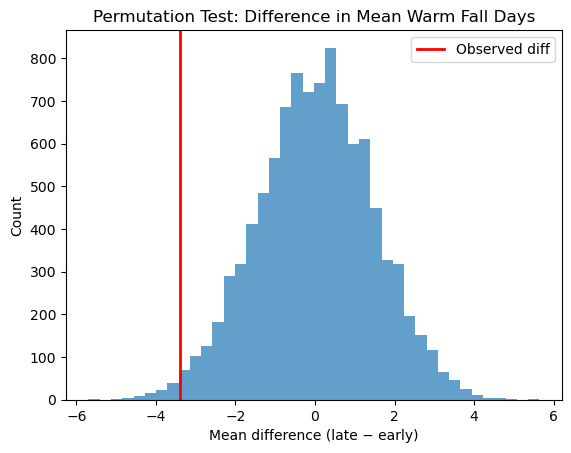

In [17]:
plt.hist(perm_diffs, bins=40, alpha=0.7)
plt.axvline(obs_diff, color='red', linewidth=2, label='Observed diff')
plt.title("Permutation Test: Difference in Mean Warm Fall Days")
plt.xlabel("Mean difference (late − early)")
plt.ylabel("Count")
plt.legend()
plt.show()


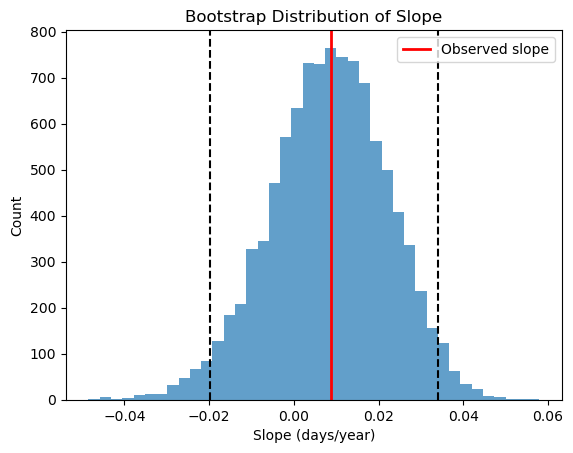

In [18]:
### Unfortunately it looks like the p-value is .99 which means my resuslts are consistent
##with the null. 
###I fail to reject the null hypothesis. There is no evidence of an increase in "warm" fall days.

### For my next trick, Ill be running a bootstrap on the slope of increase of days of greater than
### 75 degree days in the fall. The null hypothesis is that the long term rate of change in the number
### of greater than 75 degree days is 0.
### Alternative hypothesis is that the long term rate of change in the number of 75 degree days in the fall
### is greater than zero. 


x = yearly['year'].values
y = yearly['warm75_days_fall'].values

obs_slope, _ = np.polyfit(x, y, 1)


n_boot = 10_000
boot_slopes = np.empty(n_boot)

n = len(yearly)

for i in range(n_boot):
    idx = np.random.choice(n, size=n, replace=True)
    x_boot = x[idx]
    y_boot = y[idx]
    boot_slopes[i], _ = np.polyfit(x_boot, y_boot, 1)

ci_lower, ci_upper = np.percentile(boot_slopes, [2.5, 97.5])

obs_slope, ci_lower, ci_upper

plt.hist(boot_slopes, bins=40, alpha=0.7)
plt.axvline(obs_slope, color='red', linewidth=2, label='Observed slope')
plt.axvline(ci_lower, color='black', linestyle='--')
plt.axvline(ci_upper, color='black', linestyle='--')
plt.xlabel("Slope (days/year)")
plt.ylabel("Count")
plt.title("Bootstrap Distribution of Slope")
plt.legend()
plt.show()



In [ ]:
### Since 0 lies between th 95% bootstrap confidence interval, the data do not provide
### strong evidence of a statistically reliable increase in the number of 75 degree
### days per year. The trend is small and uncertain. 





In [ ]:
### Thiis is the officiall markdown for both the permutation test and the 
### bootstrapt test.

## For the permutation test my null hypothesis is that the mean number of greater tha 75 degree days
###is the same before and after 1950.
### The alternative hypothesis is that the mean number of greater that 7f degree days in the fall is
### higher after 1950 than before 1950.

### Unfortunately it looks like the p-value is .99 which means my resuslts are consistent
##with the null. 
###I fail to reject the null hypothesis. There is no evidence of an increase in "warm" fall days.

### For the bootstrap section a bootstrap on the slope of increase of days of greater than
### 75 degree days in the fall. The null hypothesis is that the long term rate of change in the number
### of greater than 75 degree days is 0.
### Alternative hypothesis is that the long term rate of change in the number of 75 degree days in the fall
### is greater than zero. 

### Since 0 lies between th 95% bootstrap confidence interval, the data do not provide
### strong evidence of a statistically reliable increase in the number of 75 degree
### days per year. The trend is small and uncertain. 

